# STAT 201 Group Proposal Group 27
___________________________________________

## Title: Explore the students academic performance with Relationship factor

## Introduction:

(more background information)

Our project aims to research on whether student's academic performance in a university are affected if they are on a relationship with a partner. The dataset consists of 145 students which shows their individual GPA, relationship status, number of siblings, weekly study hours, parents' marital status and other factors. We decide to choose to explore relationship status and GPA for the project. The code below shows the code required for the project and reading of data from GitHub.

### Preliminary Results: Proportion of student above Cumulative GPA 3.0


In [2]:
# Libraries required for the proposal
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(httr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

In [3]:
student_gpa <- read_csv('https://raw.githubusercontent.com/anjx123/stats201-group-project/Dataset-Refactor/student_prediction.csv')
head(student_gpa) # First 6 data

Rows: 145 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STUDENTID
dbl (32): AGE, GENDER, HS_TYPE, SCHOLARSHIP, WORK, ACTIVITY, PARTNER, SALARY...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


                                                Figure 1

Figure 1 (above) shows the first 6 data obtained from the dataset which contained the different variables such as prepartion for study and the number of hours spent on studying. For the project, we are only interested if students who has a partner and without a partner will affect their GPA. 

The code as shown in Figure 2 below shows the data wrangling of the dataset that is required for the project and counts the number of students who has or do not have a partner among the 145 students that were in the dataset.

In [4]:
student_gpa |> summarize(PartnerCount = sum(PARTNER == 1),     # With partner 
                       NoPartnerCount = sum(PARTNER == 2))     # Without partner

PartnerCount,NoPartnerCount
<int>,<int>
61,84


                    Figure 2

### Data Wrangling

Figure 2 shows a person has a partner or not is represented by 1- for Yes and 2- for No. We tidy this up so that it is much more clear to read and understand. In the process, we select the two columns that we are interested in, whether an individual has a partner, and their cumulative GPA.
We can then group these students by whether they have a partner or not, and calculate the sample mean of their cumulative GPA.


In [35]:
partner_data <- student_gpa |> select(STUDENTID, PARTNER, CUML_GPA,EXP_GPA) |> mutate(PARTNER = recode(PARTNER, '1' = "Yes", '2' = "No"))
head(partner_data)

STUDENTID,PARTNER,CUML_GPA,EXP_GPA
<chr>,<chr>,<dbl>,<dbl>
STUDENT1,No,1,1
STUDENT2,No,2,3
STUDENT3,No,2,2
STUDENT4,Yes,3,2
STUDENT5,Yes,2,2
STUDENT6,No,4,4


(writing part: explain the cols:CUML_GPA means, and we figure out the student GPA above the 3.0 which means CUML_GPA greater than 4)

In [30]:
prop_gpas <- student_gpa |> group_by(PARTNER) |> 
summarize(total = n(),
    p_gpa_above_3.0 = sum(CUML_GPA >= 4)/total)
head(prop_gpas)

PARTNER,total,p_gpa_above_3.0
<dbl>,<int>,<dbl>
1,61,0.4590164
2,84,0.4404762


            Figure 3: proportion of students' GPA above 3.0

According Figure 3, we found that the students with partner have slightly higher proportion of GPA above 3.0, than that of student without partner. 

### Preliminary Results: Proportion of student expected GPA above 3.0

(explanation: focus on another parameter related to relationship)

In [31]:
prop_expect_gpas <- student_gpa |> group_by(PARTNER) |> 
summarize(total = n(),
    p_expect_gpa_above_3.0 = sum(EXP_GPA >= 4)/total)
head(prop_expect_gpas)

PARTNER,total,p_expect_gpa_above_3.0
<dbl>,<int>,<dbl>
1,61,0.2295082
2,84,0.1904762


            Figure 4: Proportion of students' expected GPA above 3.0

### Visualization: Proportion of students' GPA above 3.0

In order to compare the student performance with the factor `PARTNER`, we visualize the distribution of cumulative GPA separately, for student with Partner and without Partner. We compare the sample distribution of Students' GPA, finding if there have difference in school performance. Figure 5a and 5b shows the cumulative GPA for students who had a partner and the culumulative GPA for students who do not have a partner respectively.

Because our project statistics is the proportion for student GPAs greater than 3.0, we use the solid line at CUML_GPA == 4 (which means the GPA at 4 level, 3.0), inspecting if one group of students have higher proportion in the distribution.


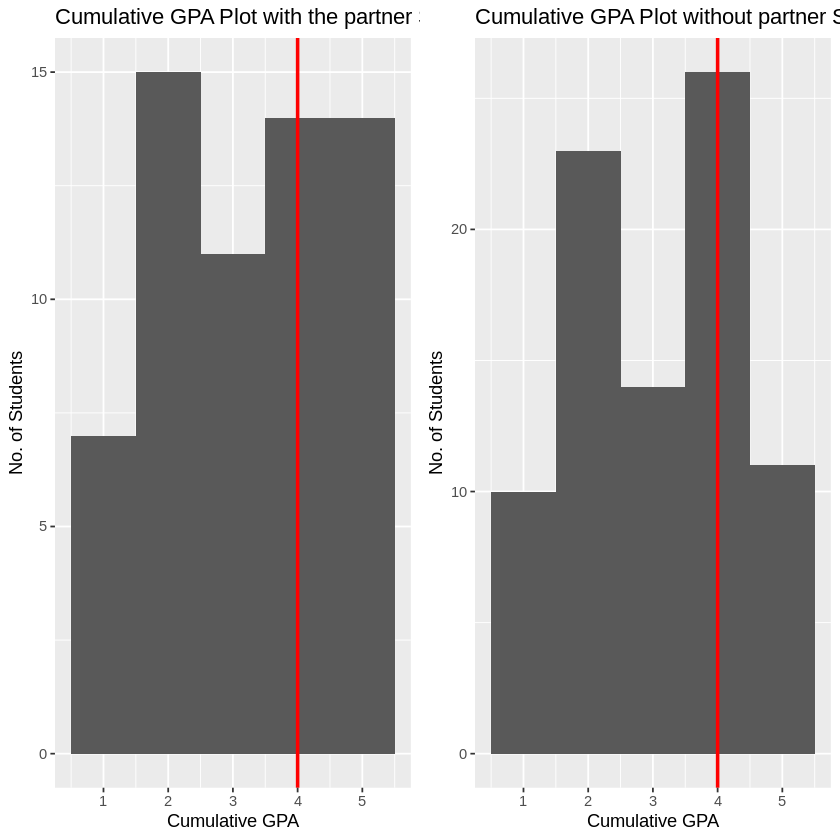

In [27]:

partner_stu_gpa_plot <- partner_data |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x = CUML_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Cumulative GPA", title = "Cumulative GPA Plot with the partner Students", y = "No. of Students")

no_partner_stu_gpa_plot <- partner_data |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = CUML_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Cumulative GPA", title = "Cumulative GPA Plot without partner Students", y = "No. of Students") #+


plot_grid(partner_stu_gpa_plot,no_partner_stu_gpa_plot)

                            Figure 5a & Figure 5b: Sample distribution of Cumulative GPA

### Visualization: Proportion of students' expected GPA greater than 3.0

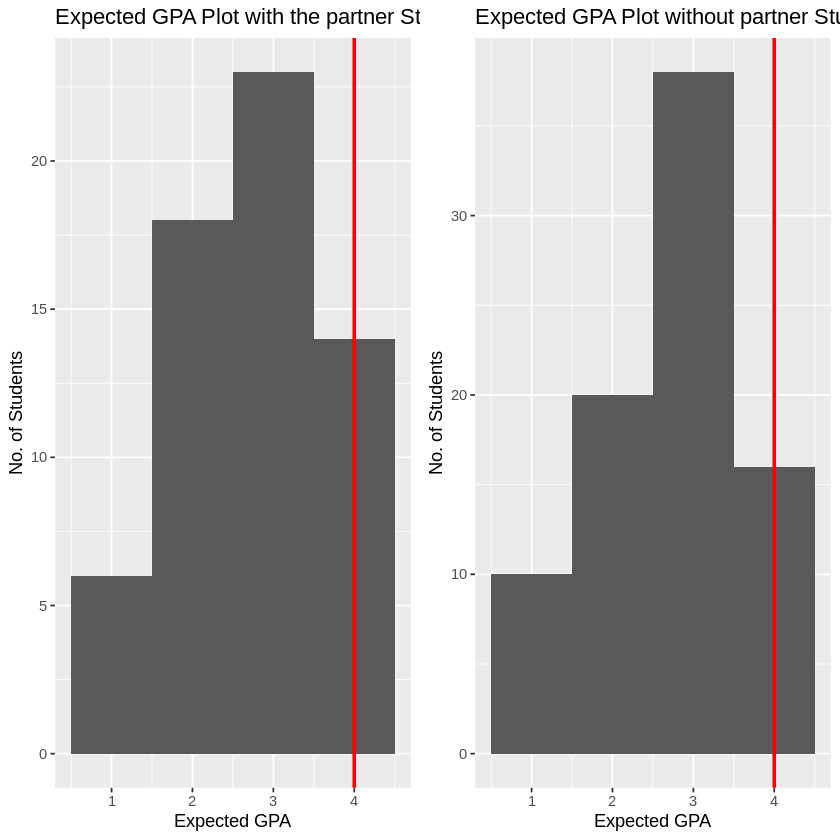

In [38]:
partner_stu_expect_gpa_plot <- partner_data |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x =EXP_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Expected GPA", title = "Expected GPA Plot with the partner Students", y = "No. of Students")

no_partner_stu_expect_gpa_plot <- partner_data |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = EXP_GPA))+
    geom_histogram(binwidth = 1) +
    geom_vline(aes(xintercept = 4), color = "red", linetype = "solid", size = 1) +
    labs(x = "Expected GPA", title = "Expected GPA Plot without partner Students", y = "No. of Students") #+


plot_grid(partner_stu_expect_gpa_plot,no_partner_stu_expect_gpa_plot)

            Figure 6a & Figure 6b: Sample distribution of Expected GPA

(...explanation of the visualization for this factor)

### Methods: Plan
This report is trustworthy as it uses robust statistical frameworks to analyze the data. The hypothesis testing approach which includes bootstrapping to obtain confidence intervals ensures that the conclusions drawn are statistically significant and not due to random chance. In addition, the report uses data collected by a reputable source UCI's Faculty of Engineering and Faculty of Educational Sciences students which gives credit that the sample was taken without bias and representative of the population.

From our preliminary analysis, we see that students with a partner have a higher mean cumulative GPA in the sample than students who do not. However, this would not be sufficient evidence to provide to a stakeholder and declare that having a partner is better for student's GPA. This is because plots do not tell us whether the observed differences are statistically significant as they do not provide a confidence interval to show us how precise our estimates are. Therefore, there’s a risk of drawing inaccurate conclusions due to the inherent randomness of sampling. 

To address these gaps, we will conduct a hypothesis test using the infer package. The framework will be roughly as such
```r  
dataset |> specify |> hypothesize_with_independence |> generate_using_permute |> calculate_the_diff_in_mean |> get_ci |> Graph the bootstrap distribution and confidence interval
``` 
Then we will use `
get_p_value()
`
with direction set to both sides to get the p_value and compare it to a chosen significance level to see whether we should reject the null hypothesis. 

Bootstrapping to obtain the confidence interval (CI) results in fewer assumptions on the data and can be simply obtained by using `get_ci` in the infer package. 
Asymptotic relies on the Central Limit Theorem (CLT) which relies on having a sufficiently sized data set that is not heavily skewed. In this case, It would be alright to use the asymptotic method as the dataset is sufficiently large, and the difference in mean being a sum of values from the population. 

We expect to find that there will be a correlation between being in a relationship and a student's GPA as students in relationships may have more academic, emotional support that could boost mental health and stability leading to higher GPAs **(Vaeth, 2009, p.7-8)**. This is especially when relationship are steady, consequently relationships can be a distraction from studies and lead to a lower GPA when it is unhealthy. 

These findings can help other students make an informed decision of about entering or maintaining relationships during their studies. In addition, it could lead to new strategies for schools to support students such as relationship counseling or workshops on balancing personal life with academic responsibilities. **[Perhaps a Citation]**



### Further Questions ###
What specific aspects of a relationship affect a student's GPA? Is it the emotional support, the time commitment or some other factor? Perhaps we can also explore how different types of relationships have an affect on the GPA.

### References
1. Higher Education Student Performance: https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation

2. Student Performance using Artificial Intelligence Techniques: https://link.springer.com/chapter/10.1007/978-3-030-35249-3_76 

3. Comparison of GPA betweenStudents Involved and Uninvolved in a Relationship, Jessica M. Vaeth (2009): https://digitalcommons.lindenwood.edu/cgi/viewcontent.cgi?article=1140&context=psych_journals